In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 16.7 s


Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3626, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3855, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4206, length of negative training set: 28396
Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 283.947683453064.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4332, length of negative training set: 28394
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4690, length of negative training set: 28394
Optimal parameters

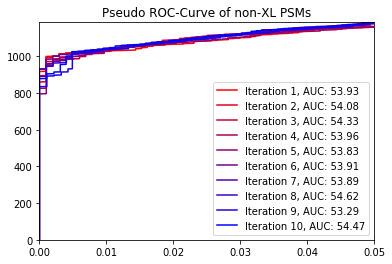

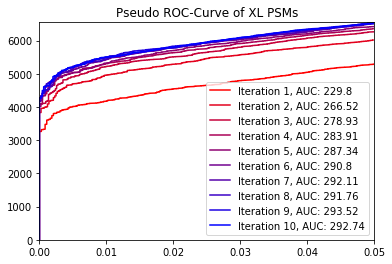

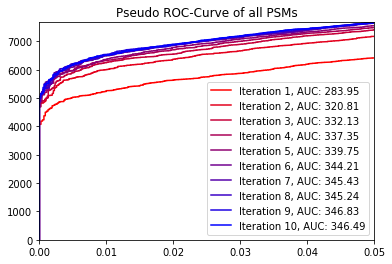

Wall time: 2min 53s


In [2]:
%%time

saveName = ''

p = percolator_experimental(dSlow, idCol, features, plotSaveName = saveName)

In [3]:
len(p.loc[p['q-val'] <= 0.01])

6538

In [13]:
dSlow.loc[:,'q-val']

15534    0.00000
15647    0.00000
12279    0.00000
14073    0.00000
14191    0.00000
          ...   
7194     0.84129
7195     0.84129
7876     0.84129
76046    0.84129
2169     0.84129
Name: q-val, Length: 93219, dtype: float64

In [11]:
len(dSlow.loc[dSlow.Label == 1])

50627

In [12]:
len(dSlow.loc[dSlow.Label == 0])

42592